In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
X = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

# Explore Numeric Data

Identifies numeric columns in a dataset and prints them out.

In [3]:
numeric_columns = []
numeric_columns.extend(list(X.dtypes[X.dtypes == np.int64].index))
numeric_columns.extend(list(X.dtypes[X.dtypes == np.float64].index))
print(numeric_columns)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']


Remove the **Id** and **SalePrice** columns from the numeric columns because **Id** is the identifier and **SalePrice** is the target variable.

In [4]:
numeric_columns.remove('Id')
numeric_columns.remove('SalePrice')

In [5]:
numeric_X = pd.DataFrame(X, columns=numeric_columns)
numeric_X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,2,2008,65.0,196.0,2003.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,5,2007,80.0,0.0,1976.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,0,9,2008,68.0,162.0,2001.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,272,0,0,0,0,2,2006,60.0,0.0,1998.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,0,12,2008,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,0,8,2007,62.0,0.0,1999.0
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,0,0,2,2010,85.0,119.0,1978.0
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,0,2500,5,2010,66.0,0.0,1941.0
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,112,0,0,0,0,4,2010,68.0,0.0,1950.0


In [6]:
numeric_y = pd.DataFrame(X, columns=['SalePrice'])
numeric_y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


# Data Preprocessing

## Check Missing Value

In [7]:
missing_value = numeric_X.isnull().sum() > 0
print(missing_value[missing_value == True].index)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


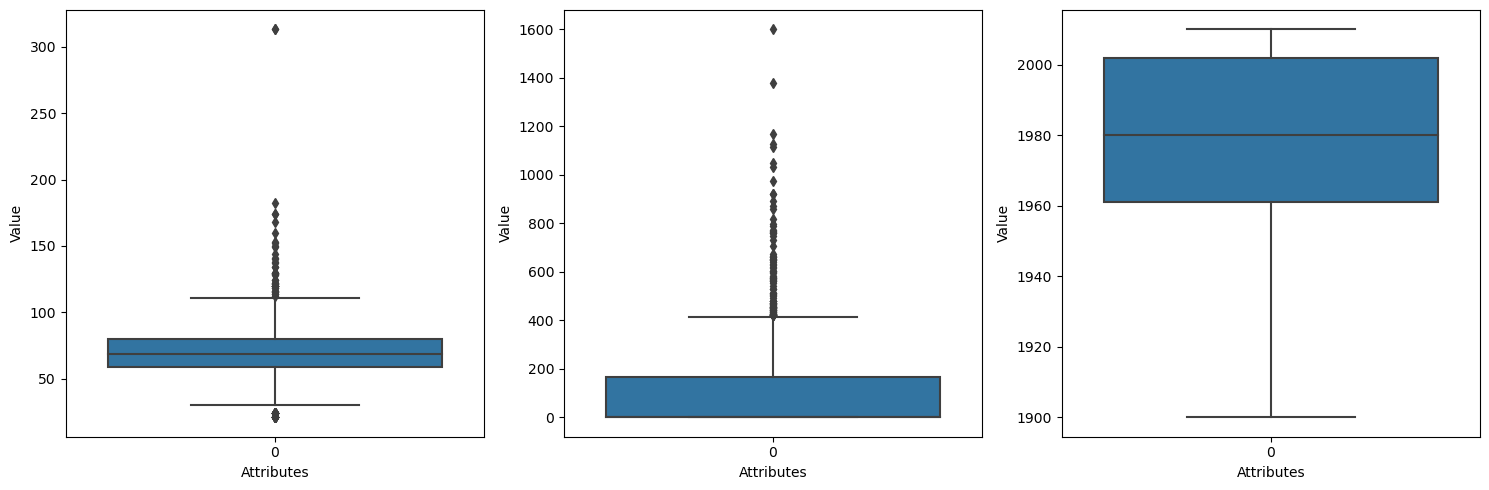

In [8]:
data_to_boxplot = [numeric_X['LotFrontage'], numeric_X['MasVnrArea'], numeric_X['GarageYrBlt']]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate(data_to_boxplot):
    sns.boxplot(data, ax=axs[i])
    axs[i].set_xlabel('Attributes')
    axs[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

The code fills the missing values with 0 for the features **LotFrontage** and **MasVnrArea**, while for the feature **GarageYrBlt** the mean value of the feature is used to fill the missing values.

In [9]:
numeric_X['LotFrontage'] = numeric_X['LotFrontage'].fillna(0)
numeric_X['MasVnrArea'] = numeric_X['MasVnrArea'].fillna(0)
numeric_X['GarageYrBlt'] = numeric_X['GarageYrBlt'].fillna(numeric_X['GarageYrBlt'].mean())

In [10]:
missing_value = numeric_X.isnull().sum() > 0
print(missing_value[missing_value == True].index)

Index([], dtype='object')


## Normalize Data

In [11]:
scaler_X = StandardScaler()
numeric_X_normalized = scaler_X.fit_transform(numeric_X)

scaler_y = StandardScaler()
numeric_y_normalized = scaler_y.fit_transform(numeric_y.values)

numeric_X = torch.tensor(numeric_X_normalized, dtype=torch.float32)
numeric_y = torch.tensor(numeric_y_normalized, dtype=torch.float32)

## Check the shape of input data and target data

In [12]:
numeric_X.shape, numeric_y.shape

(torch.Size([1460, 36]), torch.Size([1460, 1]))

# Define the deep learning model

Four fully connected layers (nn.Linear) are defined, each with a possible dropout layer between them.Dropout is a regularization technique that randomly "discards" (i.e., sets to zero) a portion of the neuron's outputs during the training process, thus reducing the model's dependence on specific training samples and enhancing the model's generalization ability. This reduces the model's dependence on specific training samples and enhances the generalization ability of the model.

The forward method defines the process of forward propagation of data through the network. In this process, the input data first passes through the first fully connected layer, then the ReLU activation function is applied (.clamp(min=0) to ensure that the output is non-negative since the house price cannot be negative), then through the Dropout layer, and finally through the subsequent layers up to the output layer.

In [13]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.dropout(y_pred)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.dropout(y_pred)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.dropout(y_pred)
        y_pred = self.linear4(y_pred)
        return y_pred

After defining the model structure, the size of each layer needs to be specified.$D_{in}$ is the number of input features, $H1$, $H2$, and $H3$ are the sizes of the hidden layers, and $D_{out}$ is the size of the output layer, which corresponds to the number of target variables to be predicted (in this example, we are predicting only one target: house prices).

In [14]:
H1, H2, H3 = 200, 800, 100
D_in, D_out = numeric_X.shape[1], numeric_y.shape[1]

In [15]:
model = Net(D_in, H1, H2, H3, D_out)

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [17]:
losses = []

for t in range(1000):
    y_pred = model(numeric_X)
    
    loss = criterion(y_pred, numeric_y)
    print(t, loss.item())
    losses.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 1.0100151300430298
1 1.0096704959869385
2 1.0064752101898193
3 1.0063010454177856
4 1.0056183338165283
5 1.0040630102157593
6 1.0076873302459717
7 1.0048624277114868
8 1.0047430992126465
9 1.001325249671936
10 1.0035563707351685
11 1.0026813745498657
12 1.0041753053665161
13 0.9981951713562012
14 0.9984294772148132
15 1.000217080116272
16 0.9967929124832153
17 0.9984672665596008
18 0.9962515830993652
19 0.9950293302536011
20 0.9941449761390686
21 0.9930696487426758
22 0.9889479279518127
23 0.9936133623123169
24 0.9940057396888733
25 0.9939294457435608
26 0.9922665357589722
27 0.9908534288406372
28 0.986157238483429
29 0.9900163412094116
30 0.9876376390457153
31 0.9901542663574219
32 0.985507071018219
33 0.9881891012191772
34 0.986163854598999
35 0.9861599206924438
36 0.9812281727790833
37 0.9808571338653564
38 0.980615496635437
39 0.9831245541572571
40 0.9793649911880493
41 0.9775418043136597
42 0.9807348847389221
43 0.9765533208847046
44 0.9750943183898926
45 0.9780909419059753
46 0

367 0.6756743788719177
368 0.6816064119338989
369 0.6653911471366882
370 0.6769257187843323
371 0.6706175208091736
372 0.66837477684021
373 0.6649566888809204
374 0.6581392288208008
375 0.6550778150558472
376 0.6641083359718323
377 0.6691911220550537
378 0.6668485999107361
379 0.6696867346763611
380 0.6603932976722717
381 0.6550050377845764
382 0.6633927226066589
383 0.6517375111579895
384 0.650629460811615
385 0.6621446013450623
386 0.6510757207870483
387 0.636972188949585
388 0.6434451937675476
389 0.6521969437599182
390 0.6342999935150146
391 0.6496245861053467
392 0.6387143731117249
393 0.6444315314292908
394 0.6467451453208923
395 0.6473421454429626
396 0.6351872086524963
397 0.6351544857025146
398 0.6460978388786316
399 0.6404703855514526
400 0.6410979628562927
401 0.6334024667739868
402 0.6267144680023193
403 0.6189531683921814
404 0.6224063634872437
405 0.6228713393211365
406 0.6356972455978394
407 0.6156644821166992
408 0.6243196129798889
409 0.6149786710739136
410 0.618084192

726 0.3079933226108551
727 0.3029930293560028
728 0.3031022548675537
729 0.31974363327026367
730 0.29774245619773865
731 0.300731360912323
732 0.3161780834197998
733 0.29767143726348877
734 0.3112960457801819
735 0.293315052986145
736 0.3083192706108093
737 0.32018813490867615
738 0.305301308631897
739 0.3053823709487915
740 0.2985565960407257
741 0.29930803179740906
742 0.3045501708984375
743 0.2993359863758087
744 0.3053801357746124
745 0.29371994733810425
746 0.28355905413627625
747 0.29930993914604187
748 0.3157210946083069
749 0.3061125874519348
750 0.2994806468486786
751 0.2915884256362915
752 0.29979923367500305
753 0.29263240098953247
754 0.31685352325439453
755 0.2966061234474182
756 0.3000715374946594
757 0.30301421880722046
758 0.2838679552078247
759 0.28899824619293213
760 0.28078868985176086
761 0.2952516973018646
762 0.31424015760421753
763 0.30901435017585754
764 0.30420684814453125
765 0.2982787787914276
766 0.2904357314109802
767 0.3187904357910156
768 0.30184653401374

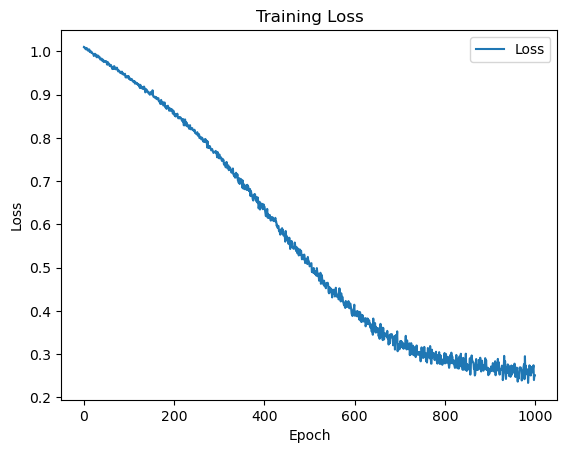

In [18]:
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Evaluate the model

In [19]:
numeric_test_x = pd.DataFrame(test, columns=numeric_columns)
numeric_test_x.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,0,0,120,0,0,6,2010,80.0,0.0,1961.0
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,0,0,0,0,12500,6,2010,81.0,108.0,1958.0
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,0,0,0,0,0,3,2010,74.0,0.0,1997.0
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,0,0,0,0,0,6,2010,78.0,20.0,1998.0
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,0,0,144,0,0,1,2010,43.0,0.0,1992.0


In [20]:
for col in numeric_columns:
    numeric_test_x[col].fillna(0)

In [21]:
scaler_test_x = StandardScaler()
numeric_test_x_normalized = scaler_test_x.fit_transform(numeric_test_x)

numeric_test_x = torch.tensor(numeric_test_x_normalized, dtype=torch.float32)

Prediction of normalized test data using trained models.

In [22]:
numeric_test_y = model(torch.tensor(numeric_test_x, dtype=torch.float32))
numeric_test_y

C:\Users\zengsong\AppData\Local\Temp\ipykernel_33608\2299806069.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  numeric_test_y = model(torch.tensor(numeric_test_x, dtype=torch.float32))


tensor([[-0.4518],
        [ 0.0222],
        [-0.1209],
        ...,
        [ 0.5789],
        [    nan],
        [ 0.7810]], grad_fn=<AddmmBackward0>)

In [23]:
numeric_test_y[torch.isnan(numeric_test_y)] = 0
numeric_test_y

tensor([[-0.4518],
        [ 0.0222],
        [-0.1209],
        ...,
        [ 0.5789],
        [ 0.0000],
        [ 0.7810]], grad_fn=<IndexPutBackward0>)

In [24]:
result = pd.DataFrame(numeric_test_y.data.numpy(), columns=['SalePrice'])
result

,SalePrice
0,-0.451797
1,0.022159
2,-0.120911
3,-0.073090
4,-0.357891
...,...
1454,0.000000
1455,-0.773897
1456,0.578912
1457,0.000000


Since the forecasts are obtained on standardized data, they need to be converted back to the original scale in order to obtain actual house price forecasts.

In [25]:
predicted_unnormalized = scaler_y.inverse_transform(numeric_test_y.data.numpy())

result = pd.DataFrame(predicted_unnormalized, columns=['SalePrice'])
result

,SalePrice
0,145041.593750
1,182680.937500
2,171319.031250
3,175116.750000
4,152499.156250
...,...
1454,180921.203125
1455,119461.945312
1456,226895.687500
1457,180921.203125


In [26]:
result.isnull().sum()

SalePrice    0
dtype: int64

In [27]:
result['Id'] = np.array(result.index)
result['Id'] = result['Id'] + 1461
result = pd.DataFrame(result, columns=['Id', 'SalePrice'])
result.head()

,Id,SalePrice
0,1461,145041.59375
1,1462,182680.93750
2,1463,171319.03125
3,1464,175116.75000
4,1465,152499.15625


In [28]:
result.to_csv('output/submission_para.csv', columns=['Id', 'SalePrice'], index=False)